In [508]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [509]:
df = pd.read_csv('LUBS5990M_courseworkData_202425.csv')

In [510]:
df.head()

,country,ico_start,ico_end,price_usd,success,distributed_in_ico,sold_tokens,token_for_sale,whitelist,kyc,...,pre_ico_end,pre_ico_price_usd,accepting,link_white_paper,linkedin_link,github_link,website,rating,teamsize,ERC20
0,India,10/08/2020,31/12/2020,0.01,Y,0.5,1.00E+08,500000000.0,Yes,1.0,...,NaN,5.00E-03,"BTC, ETH, and Fiat currency",NaN,https://www.linkedin.com/company/bitfinex-limi...,NaN,NaN,4.0,NaN,1.0
1,Cyprus,01/08/2020,31/12/2020,0.1,N,0.6,NaN,84000000.0,No,1.0,...,31/10/2019,NaN,"ETH, BTC",https://www.tycoon.io/whitepaper.pdf,https://www.linkedin.com/company/tycoonio/about/,https://www.github.com/tycoon?tab=repositories,https://www.tycoon.io?utm_source=icobench,4.8,14.0,1.0
2,UK,01/03/2019,31/12/2020,0.14,Y,0.5,NaN,75000000.0,No,0.0,...,15/01/2019,NaN,"ETH, BTC, LTC",https://mindsync.ai/docs/whitepaper.pdf,https://www.linkedin.com/company/mindsync/,NaN,NaN,4.5,14.0,1.0
3,UK,25/06/2020,31/01/2021,0.1,N,0.5,NaN,500000000.0,Yes,1.0,...,NaN,0.1,"BTC, ETH, XRP, BNB, LTC, XLM, USDT, BCH, TRX, EOS",https://cdn.pointpay.io/WhitePaper__en.pdf?cac...,https://www.linkedin.com/company/pointpay/about/,NaN,NaN,4.7,43.0,1.0
4,Seychelles,NaN,NaN,0.06,N,0.4,NaN,400000000.0,Yes,1.0,...,NaN,0.03,ETH,https://lohncontrol.com/down/LOHN-white-paper-...,https://www.linkedin.com/showcase/lohncontrol,https://www.github.com/lohn7?tab=repositories,https://lohncontrol.com?utm_source=icobench,4.4,16.0,1.0


In [511]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             6124 non-null   object 
 1   ico_start           5378 non-null   object 
 2   ico_end             5242 non-null   object 
 3   price_usd           5662 non-null   object 
 4   success             6146 non-null   object 
 5   distributed_in_ico  4661 non-null   object 
 6   sold_tokens         180 non-null    object 
 7   token_for_sale      4908 non-null   float64
 8   whitelist           3712 non-null   object 
 9   kyc                 6125 non-null   float64
 10  bonus               6125 non-null   float64
 11  restricted_areas    1954 non-null   object 
 12  min_investment      1984 non-null   object 
 13  mvp                 1243 non-null   object 
 14  pre_ico_start       2605 non-null   object 
 15  pre_ico_end         2593 non-null   object 
 16  pre_ic

In [512]:
# Convert date columns to datetime format
df['ico_start'] = pd.to_datetime(df['ico_start'], dayfirst=True, errors='coerce')
df['ico_end'] = pd.to_datetime(df['ico_end'], dayfirst=True, errors='coerce')
df['ico_length'] = (df['ico_end'] - df['ico_start']).dt.days
df['pre_ico_start'] = pd.to_datetime(df['pre_ico_start'], dayfirst=True, errors='coerce')
df['pre_ico_end'] = pd.to_datetime(df['pre_ico_end'], dayfirst=True, errors='coerce')
df['pre_ico_length'] = (df['pre_ico_end'] - df['pre_ico_start']).dt.days
df.drop(columns=['ico_start', 'pre_ico_start', 'ico_end', 'pre_ico_end'], inplace=True)

In [513]:
df['ico_length'].describe()

count    5220.000000
mean       66.724904
std       106.454647
min      -330.000000
25%        28.000000
50%        39.500000
75%        82.000000
max      3722.000000
Name: ico_length, dtype: float64

In [514]:
df['success'] = df['success'].map({'Y': 1, 'N': 0})
df['whitelist'] = df['whitelist'].map({'Yes': 1, 'No': 0})


In [515]:
df['link_white_paper'] = np.where(df['link_white_paper'].isna(), 0, 1)
df['github_link'] = np.where(df['github_link'].isna(), 0, 1)
df['website'] = np.where(df['website'].isna(), 0, 1)
df['linkedin_link'] = np.where(df['linkedin_link'].isna(), 0, 1)

In [516]:
df.head()

,country,price_usd,success,distributed_in_ico,sold_tokens,token_for_sale,whitelist,kyc,bonus,restricted_areas,...,accepting,link_white_paper,linkedin_link,github_link,website,rating,teamsize,ERC20,ico_length,pre_ico_length
0,India,0.01,1,0.5,1.00E+08,500000000.0,1.0,1.0,1.0,"Pakistan, Turkey, Somalia, Sirya, Sudan",...,"BTC, ETH, and Fiat currency",0,1,0,0,4.0,NaN,1.0,143.0,NaN
1,Cyprus,0.1,0,0.6,NaN,84000000.0,0.0,1.0,0.0,USA,...,"ETH, BTC",1,1,1,1,4.8,14.0,1.0,152.0,101.0
2,UK,0.14,1,0.5,NaN,75000000.0,0.0,0.0,1.0,"Cuba, Iran, Lebanon, Syria, Libya, Sudan, Soma...",...,"ETH, BTC, LTC",1,1,0,0,4.5,14.0,1.0,671.0,31.0
3,UK,0.1,0,0.5,NaN,500000000.0,1.0,1.0,1.0,"Cuba, Iran, Lebanon, Syria, Libya, Sudan, Soma...",...,"BTC, ETH, XRP, BNB, LTC, XLM, USDT, BCH, TRX, EOS",1,1,0,0,4.7,43.0,1.0,220.0,NaN
4,Seychelles,0.06,0,0.4,NaN,400000000.0,1.0,1.0,1.0,"USA, CANADA, CHINA, SOUTH KOREA, SEYCHELLES",...,ETH,1,1,1,1,4.4,16.0,1.0,NaN,NaN


In [517]:
df['accepting'] = df['accepting'].str.replace('and', '').str.strip()

accepting_dummies = df['accepting'].str.get_dummies(sep=',')


In [605]:
threshold = df.shape[0] * 0.01
accepting_dummies = accepting_dummies.loc[:, accepting_dummies.sum() > threshold]
df = pd.concat([df, accepting_dummies], axis=1)
df = df.drop(columns=['accepting'])
df.head()

,country,price_usd,success,distributed_in_ico,token_for_sale,whitelist,kyc,bonus,restricted_areas,mvp,...,EUR,Fiat,LTC,USD,USDT,XMR,XRP,ZEC,BTC,ETH
0,India,0.01,1,0.5,500000000.0,1.0,1.0,1.0,"PAK,TUR,SOM,not found,SDN",1.0,...,0,0,0,0,0,0,0,0,1,0
1,Cyprus,0.10,0,0.6,84000000.0,0.0,1.0,0.0,USA,1.0,...,0,0,0,0,0,0,0,0,0,1
2,UK,0.14,1,0.5,75000000.0,0.0,0.0,1.0,"CUB,IRN,LBN,SYR,LBY,SDN,SOM,UKR,EST,PRK, RUS",1.0,...,0,0,1,0,0,0,0,0,0,1
3,UK,0.10,0,0.5,500000000.0,1.0,1.0,1.0,"CUB,IRN,LBN,SYR,LBY,SDN,PRK, SOM,YEM",1.0,...,0,0,1,0,1,0,1,0,1,0
4,Seychelles,0.06,0,0.4,400000000.0,1.0,1.0,1.0,"USA,CAN,CHN,KOR,SYC",1.0,...,0,0,0,0,0,0,0,0,0,1


In [519]:
def returnlist(row):
    if isinstance(row, str) and pd.notna(row): 
        return [country.strip() for country in row.split(',')]  
    return row  

df['restricted_areas'] = df['restricted_areas'].apply(returnlist)

In [520]:
df['restricted_areas']

0               [Pakistan, Turkey, Somalia, Sirya, Sudan]
1                                                   [USA]
2       [Cuba, Iran, Lebanon, Syria, Libya, Sudan, Som...
3       [Cuba, Iran, Lebanon, Syria, Libya, Sudan, Som...
4           [USA, CANADA, CHINA, SOUTH KOREA, SEYCHELLES]
                              ...                        
6141                                                  NaN
6142                                                  NaN
6143                                                  NaN
6144                                                  NaN
6145                                                  NaN
Name: restricted_areas, Length: 6146, dtype: object

In [521]:
import country_converter as coco
cc = coco.CountryConverter()


In [522]:
df.head()

,country,price_usd,success,distributed_in_ico,sold_tokens,token_for_sale,whitelist,kyc,bonus,restricted_areas,...,EUR,Fiat,LTC,USD,USDT,XMR,XRP,ZEC,BTC,ETH
0,India,0.01,1,0.5,1.00E+08,500000000.0,1.0,1.0,1.0,"[Pakistan, Turkey, Somalia, Sirya, Sudan]",...,0,0,0,0,0,0,0,0,1,0
1,Cyprus,0.1,0,0.6,NaN,84000000.0,0.0,1.0,0.0,[USA],...,0,0,0,0,0,0,0,0,0,1
2,UK,0.14,1,0.5,NaN,75000000.0,0.0,0.0,1.0,"[Cuba, Iran, Lebanon, Syria, Libya, Sudan, Som...",...,0,0,1,0,0,0,0,0,0,1
3,UK,0.1,0,0.5,NaN,500000000.0,1.0,1.0,1.0,"[Cuba, Iran, Lebanon, Syria, Libya, Sudan, Som...",...,0,0,1,0,1,0,1,0,1,0
4,Seychelles,0.06,0,0.4,NaN,400000000.0,1.0,1.0,1.0,"[USA, CANADA, CHINA, SOUTH KOREA, SEYCHELLES]",...,0,0,0,0,0,0,0,0,0,1


In [523]:
# Explode the restricted_areas column so that each country is in its own row
df_exploded = df.explode('restricted_areas')

# Convert the countries to ISO3 codes
iso3_codes = cc.pandas_convert(series=pd.Series(df_exploded['restricted_areas']), to='ISO3')

Sirya not found in regex
More than one regular expression match for Russian Federation and North Korea
More than one regular expression match for Russian Federation and North Korea
More than one regular expression match for Russian Federation and North Korea
More than one regular expression match for Russian Federation and North Korea
More than one regular expression match for Russian Federation and North Korea
More than one regular expression match for Russian Federation and North Korea
More than one regular expression match for Russian Federation and North Korea
More than one regular expression match for Russian Federation and North Korea
More than one regular expression match for Russian Federation and North Korea
More than one regular expression match for Russian Federation and North Korea
More than one regular expression match for Russian Federation and North Korea
More than one regular expression match for Russian Federation and North Korea
More than one regular expression match 

In [524]:
iso3_codes

0             PAK
0             TUR
0             SOM
0       not found
0             SDN
          ...    
6141    not found
6142    not found
6143    not found
6144    not found
6145    not found
Name: restricted_areas, Length: 11805, dtype: object

In [525]:

# Add the iso3_codes column to df_exploded
df_exploded['iso3_codes'] = iso3_codes.values

df_exploded['iso3_codes']

0             PAK
0             TUR
0             SOM
0       not found
0             SDN
          ...    
6141    not found
6142    not found
6143    not found
6144    not found
6145    not found
Name: iso3_codes, Length: 11805, dtype: object

In [526]:
restricted_areas = df_exploded.groupby(df_exploded.index).agg({'iso3_codes': lambda x: ",".join(x.fillna('').astype(str))})

In [527]:
restricted_areas

,iso3_codes
0,"PAK,TUR,SOM,not found,SDN"
1,USA
2,"CUB,IRN,LBN,SYR,LBY,SDN,SOM,UKR,EST,['PRK', 'R..."
3,"CUB,IRN,LBN,SYR,LBY,SDN,['PRK', 'SOM'],YEM"
4,"USA,CAN,CHN,KOR,SYC"
...,...
6141,not found
6142,not found
6143,not found
6144,not found


In [528]:
df['restricted_areas'] = restricted_areas['iso3_codes'].values

In [529]:
df['restricted_areas'] = df['restricted_areas'].str.replace(r"[\[\]']", '', regex=True)

In [530]:
areas_dummies = df['restricted_areas'].str.get_dummies(sep=',')
threshold = df.shape[0] * 0.01
areas_dummies = areas_dummies.loc[:, areas_dummies.sum() > threshold]
df = pd.concat([df, areas_dummies], axis=1)
df.head()

,country,price_usd,success,distributed_in_ico,sold_tokens,token_for_sale,whitelist,kyc,bonus,restricted_areas,...,PAK,PRK,SDN,SGP,SOM,SYR,TUN,USA,YEM,not found
0,India,0.01,1,0.5,1.00E+08,500000000.0,1.0,1.0,1.0,"PAK,TUR,SOM,not found,SDN",...,1,0,1,0,1,0,0,0,0,1
1,Cyprus,0.1,0,0.6,NaN,84000000.0,0.0,1.0,0.0,USA,...,0,0,0,0,0,0,0,1,0,0
2,UK,0.14,1,0.5,NaN,75000000.0,0.0,0.0,1.0,"CUB,IRN,LBN,SYR,LBY,SDN,SOM,UKR,EST,PRK, RUS",...,0,1,1,0,1,1,0,0,0,0
3,UK,0.1,0,0.5,NaN,500000000.0,1.0,1.0,1.0,"CUB,IRN,LBN,SYR,LBY,SDN,PRK, SOM,YEM",...,0,1,1,0,0,1,0,0,1,0
4,Seychelles,0.06,0,0.4,NaN,400000000.0,1.0,1.0,1.0,"USA,CAN,CHN,KOR,SYC",...,0,0,0,0,0,0,0,1,0,0


In [531]:
df.loc[df["ico_length"] < 0, "ico_length"] = -df.loc[df["ico_length"] < 0, "ico_length"]
df.loc[df["pre_ico_length"] < 0, "pre_ico_length"] = -df.loc[df["pre_ico_length"] < 0, "pre_ico_length"]

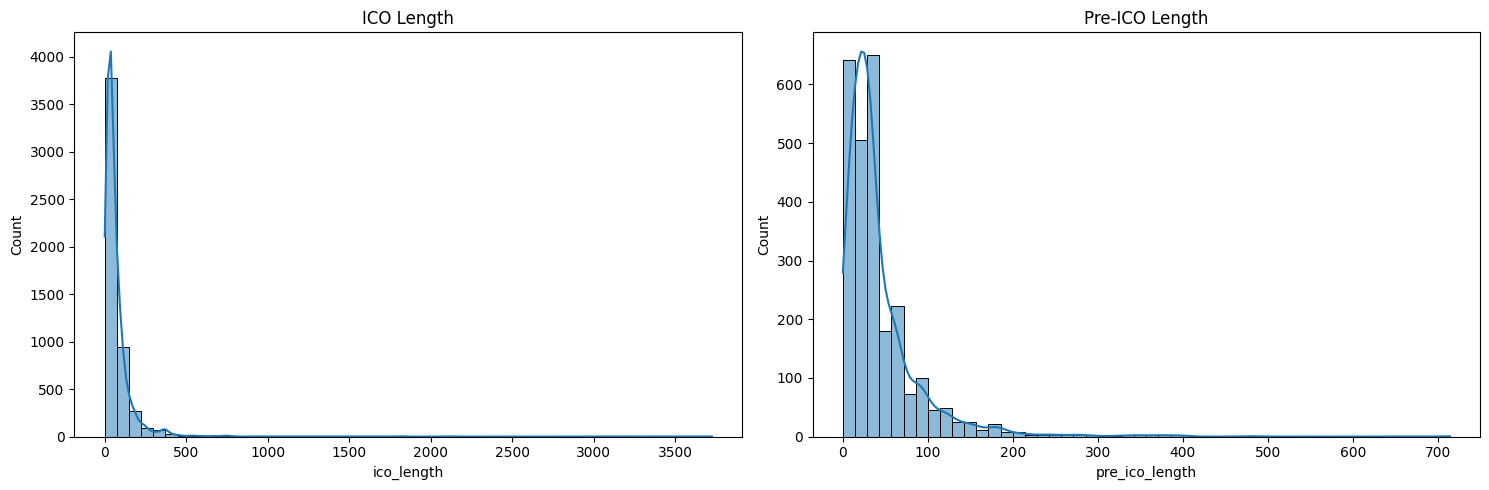

In [532]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df['ico_length'], bins=50, kde=True, ax=ax[0])
sns.histplot(df['pre_ico_length'], bins=50, kde=True, ax=ax[1])
ax[0].set_title('ICO Length')
ax[1].set_title('Pre-ICO Length')
plt.tight_layout()

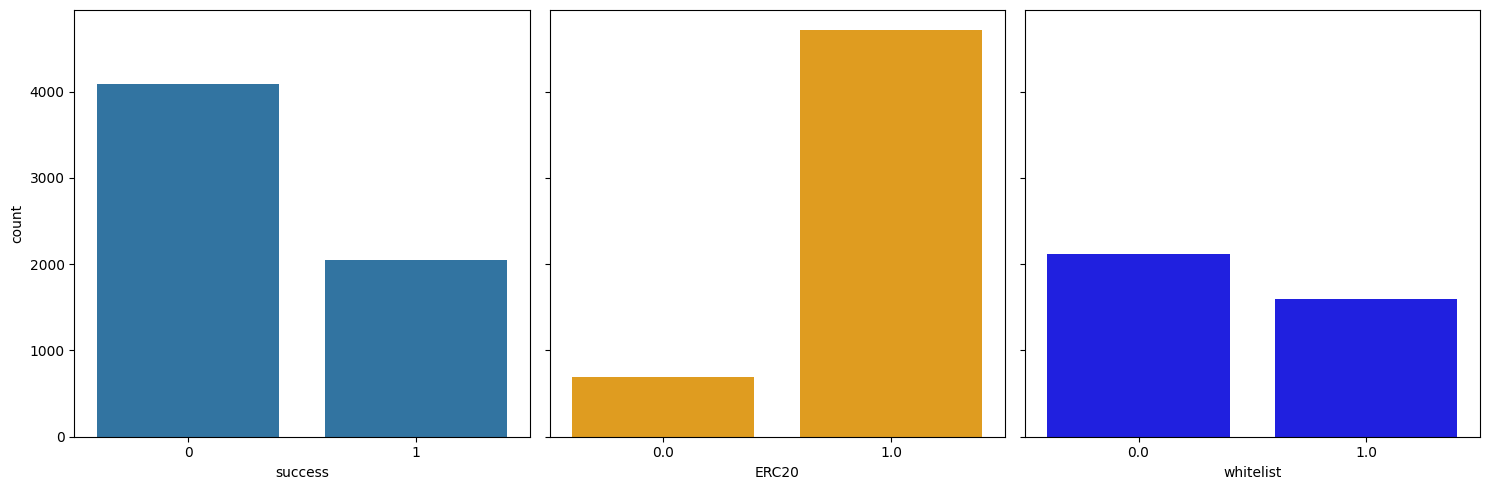

In [533]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.countplot(data=df, x='success', ax=ax[0])
sns.countplot(data=df, x='ERC20', ax=ax[1], color='orange')
sns.countplot(data=df, x='whitelist', ax=ax[2], color='blue')
plt.tight_layout()

In [536]:
df["distributed_in_ico"] = pd.to_numeric(df["distributed_in_ico"], errors='coerce')
df.loc[df["distributed_in_ico"] > 1, "distributed_in_ico"] = np.nan


<Axes: xlabel='distributed_in_ico', ylabel='success'>

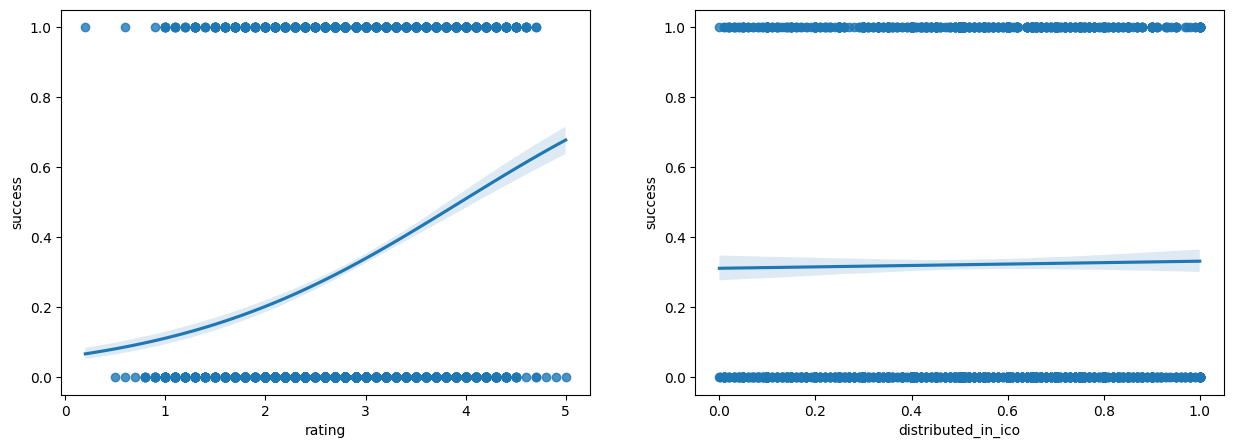

In [537]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot the first regplot
sns.regplot(data=df, x='rating', y='success', logistic=True, ax=ax[0])
df['rating'].describe
# Plot the second regplot
sns.regplot(data=df, x='distributed_in_ico', y='success', logistic=True, ax=ax[1])

In [ ]:
df.columns.values

array(['country', 'price_usd', 'success', 'distributed_in_ico',
       'sold_tokens', 'token_for_sale', 'whitelist', 'kyc', 'bonus',
       'restricted_areas', 'min_investment', 'mvp', 'pre_ico_price_usd',
       'accepting', 'link_white_paper', 'linkedin_link', 'github_link',
       'website', 'rating', 'teamsize', 'ERC20', 'ico_length',
       'pre_ico_length', ' BCH', ' BTC', ' DASH', ' ETC', ' ETH', ' EUR',
       ' Fiat', ' LTC', ' USD', ' USDT', ' XMR', ' XRP', ' ZEC', 'BTC',
       'ETH', 'AFG', 'CAN', 'CHN', 'CUB', 'ETH', 'IRN', 'IRQ', 'KOR',
       'LBY', 'LKA', 'PAK', 'PRK', 'SDN', 'SGP', 'SOM', 'SYR', 'TUN',
       'USA', 'YEM', 'not found'], dtype=object)

In [ ]:
map = pd.DataFrame({'country': areas_dummies.columns, 'count': areas_dummies.sum(axis=0).values})

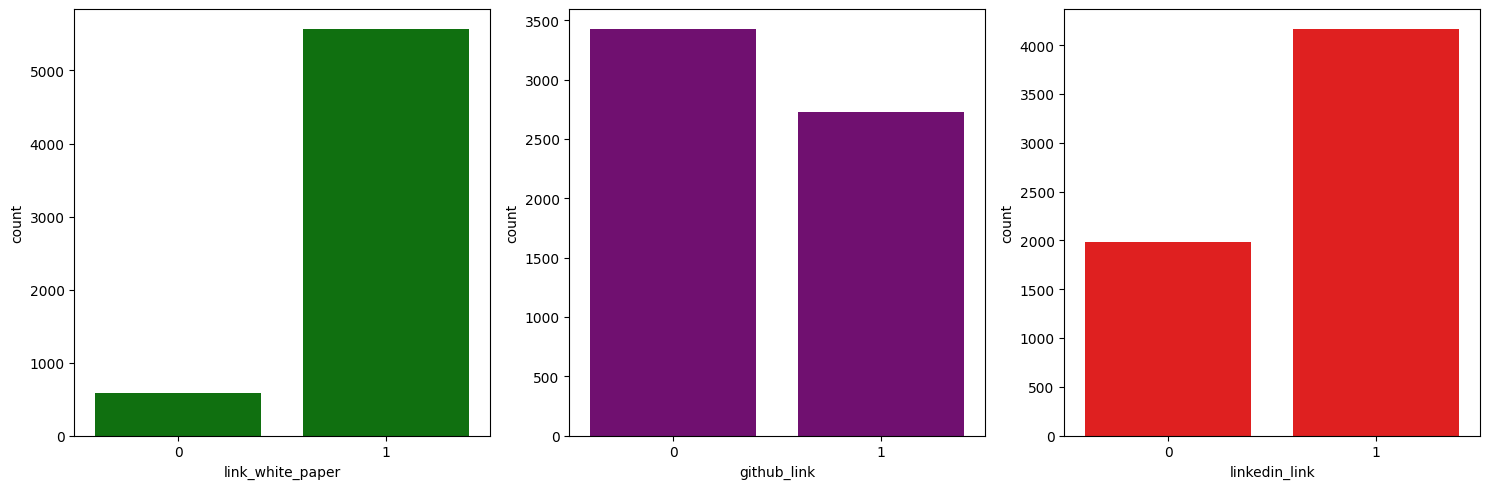

In [539]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(data=df, x='link_white_paper', ax=ax[0], color='green')
sns.countplot(data=df, x='github_link', ax=ax[1], color='purple')
sns.countplot(data=df, x='linkedin_link', ax=ax[2], color='red')
plt.tight_layout()

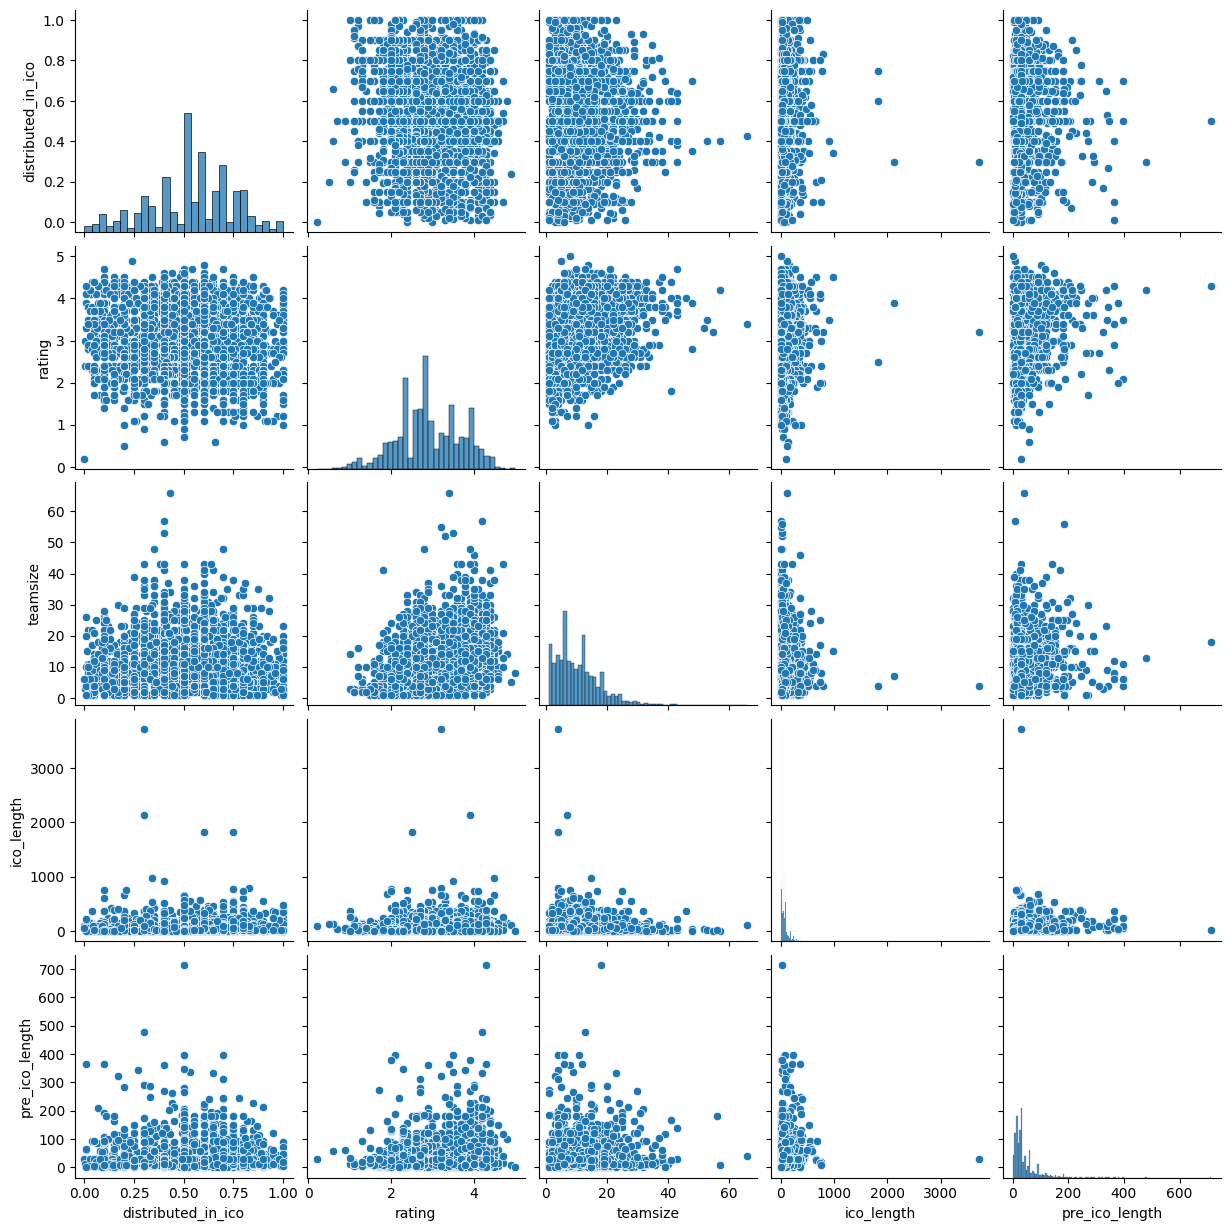

In [540]:
sns.pairplot(df[['distributed_in_ico', 'sold_tokens', 'rating', 'teamsize', 'ico_length', 
                 'pre_ico_length']], diag_kind='hist')

(0.0, 1.0)

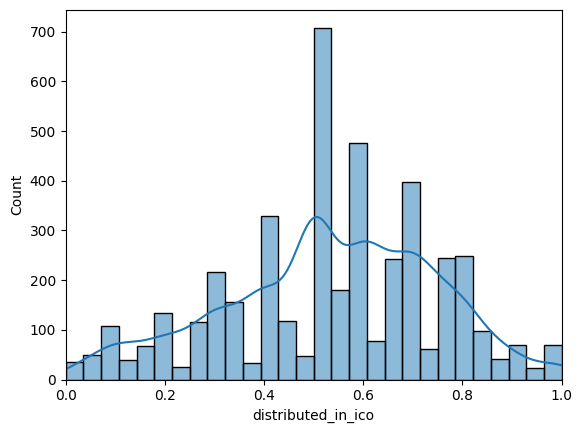

In [541]:
fig, ax = plt.subplots()
sns.histplot(df['distributed_in_ico'], kde=True, ax = ax)
ax.set_xlim(0, 1)

In [542]:
df.columns.values

array(['country', 'price_usd', 'success', 'distributed_in_ico',
       'sold_tokens', 'token_for_sale', 'whitelist', 'kyc', 'bonus',
       'restricted_areas', 'min_investment', 'mvp', 'pre_ico_price_usd',
       'accepting', 'link_white_paper', 'linkedin_link', 'github_link',
       'website', 'rating', 'teamsize', 'ERC20', 'ico_length',
       'pre_ico_length', ' BCH', ' BTC', ' DASH', ' ETC', ' ETH', ' EUR',
       ' Fiat', ' LTC', ' USD', ' USDT', ' XMR', ' XRP', ' ZEC', 'BTC',
       'ETH', 'AFG', 'CAN', 'CHN', 'CUB', 'ETH', 'IRN', 'IRQ', 'KOR',
       'LBY', 'LKA', 'PAK', 'PRK', 'SDN', 'SGP', 'SOM', 'SYR', 'TUN',
       'USA', 'YEM', 'not found'], dtype=object)

In [543]:
df.drop(columns=['sold_tokens'], inplace=True)

In [544]:
df.columns.values

array(['country', 'price_usd', 'success', 'distributed_in_ico',
       'token_for_sale', 'whitelist', 'kyc', 'bonus', 'restricted_areas',
       'min_investment', 'mvp', 'pre_ico_price_usd', 'accepting',
       'link_white_paper', 'linkedin_link', 'github_link', 'website',
       'rating', 'teamsize', 'ERC20', 'ico_length', 'pre_ico_length',
       ' BCH', ' BTC', ' DASH', ' ETC', ' ETH', ' EUR', ' Fiat', ' LTC',
       ' USD', ' USDT', ' XMR', ' XRP', ' ZEC', 'BTC', 'ETH', 'AFG',
       'CAN', 'CHN', 'CUB', 'ETH', 'IRN', 'IRQ', 'KOR', 'LBY', 'LKA',
       'PAK', 'PRK', 'SDN', 'SGP', 'SOM', 'SYR', 'TUN', 'USA', 'YEM',
       'not found'], dtype=object)

In [545]:
df['price_usd'] = np.where(df['price_usd'].str.contains("="), np.nan, df['price_usd'])
df['pre_ico_price_usd'] = np.where(df['pre_ico_price_usd'].str.contains("="), np.nan, df['pre_ico_price_usd'])

In [546]:
df.isna().sum()

country                 22
price_usd              649
success                  0
distributed_in_ico    1734
token_for_sale        1238
whitelist             2437
kyc                     21
bonus                   21
restricted_areas         0
min_investment        4162
mvp                   4903
pre_ico_price_usd     4628
accepting              856
link_white_paper         0
linkedin_link            0
github_link              0
website                  0
rating                 712
teamsize              1719
ERC20                  738
ico_length             926
pre_ico_length        3553
 BCH                     0
 BTC                     0
 DASH                    0
 ETC                     0
 ETH                     0
 EUR                     0
 Fiat                    0
 LTC                     0
 USD                     0
 USDT                    0
 XMR                     0
 XRP                     0
 ZEC                     0
BTC                      0
ETH                      0
A

In [547]:
df['mvp'] = df['mvp'].replace({'Available': 1}).fillna(0)

/var/folders/zm/k7mfmhq51gv7d8g3r5dwtjj00000gn/T/ipykernel_37479/359668041.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [548]:
df.drop(columns=['min_investment'], errors='ignore', inplace=True)
df['pre_ico_price_usd'] = pd.to_numeric(df['pre_ico_price_usd'], errors='coerce')
df['price_usd'] = pd.to_numeric(df['price_usd'], errors='coerce')

<Axes: >

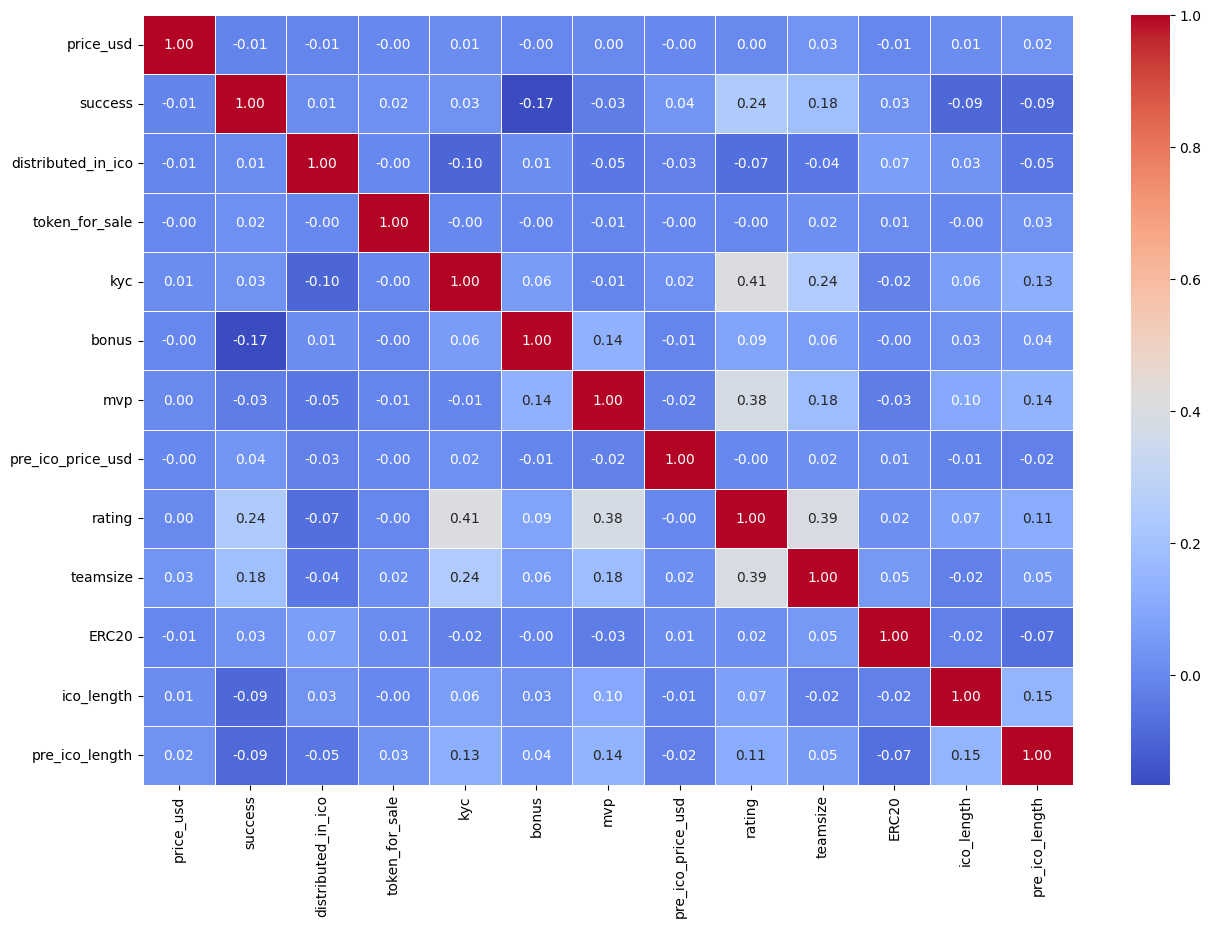

In [549]:
num_col = df.select_dtypes(exclude='object').columns
cat_col = df.select_dtypes(include='object').columns
num_col1 = list(set(df.columns).intersection(accepting_dummies.columns))
num_col2 = list(set(df.columns).intersection(areas_dummies.columns))
# Combine num_col1 and num_col2 to avoid duplicate drops
columns_to_drop = set(num_col1 + num_col2)
num_col = num_col.drop(columns_to_drop)
num_col = num_col.drop(['link_white_paper', 'github_link', 'website', 'linkedin_link', 'whitelist'])
plt.figure(figsize=(15, 10))
sns.heatmap(df[num_col].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)


In [550]:
all_countries = pd.Series(X['country']) \
                  .fillna('Unknown') \
                  .unique() \
                  .tolist()

In [ ]:
all_countries

['India',
 'Cyprus',
 'UK',
 'Seychelles',
 'Australia',
 'Czech Republic',
 'Russia',
 'Spain',
 'Belize',
 'USA',
 'Denmark',
 'Singapore',
 'Germany',
 'Gibraltar',
 'British Virgin Islands',
 'Netherlands',
 'Cayman Islands',
 'Switzerland',
 'Malta',
 'France',
 'Ukraine',
 'Azerbaijan',
 'Bulgaria',
 'Estonia',
 'Canada',
 'South Korea',
 'Ireland',
 'Philippines',
 'Austria',
 'Romania',
 'Saint Kitts and Nevis',
 'Israel',
 'Nigeria',
 'Dominican Republic',
 'South Africa',
 'Georgia',
 'Norway',
 'Serbia',
 'Isle of Man',
 'Japan',
 'Lithuania',
 'Brazil',
 'Liechtenstein',
 'Mauritius',
 'Sierra Leone',
 'Slovenia',
 'Iceland',
 'Unknown',
 'Mexico',
 'Poland',
 'Italy',
 'Saint Vincent and the Grenadines',
 'Malaysia',
 'Panama',
 'Bosnia and Herzegovina',
 'Latvia',
 'United Arab Emirates',
 'Bahamas',
 'Vietnam',
 'Jamaica',
 'Indonesia',
 'Chile',
 'San Marino',
 'Uruguay',
 'Turkey',
 'Greece',
 'Croatia',
 'Kazakhstan',
 'Afghanistan',
 'Macedonia',
 'Marshall Islands',

In [551]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
np.random.seed(42)
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import pandas as pd

binary_cols = ['kyc', 'bonus', 'mvp', 'whitelist', 'ERC20']
numeric_cols = [
    'price_usd', 'distributed_in_ico', 'token_for_sale',
    'pre_ico_price_usd', 'rating', 'teamsize',
    'ico_length', 'pre_ico_length'
]
categorical_cols = ['country']

# Binary: Mode Imputation
binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
])

# Numeric: Mean Imputation + MinMax Scaling
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

# Categorical: Fill missing with 'Unknown' + OneHotEncoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(categories=[all_countries], handle_unknown='ignore', sparse_output=False))
])

# ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('binary', binary_transformer, binary_cols),
    ('numeric', numeric_transformer, numeric_cols),
    ('categorical', categorical_transformer, categorical_cols)
])


In [606]:
from sklearn.model_selection import train_test_split

# Replace with your real target column
X = df.drop(columns=['success'])
y = df['success']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [607]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

tree_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('clf', DecisionTreeClassifier(random_state=42))
])

tree_pipeline.fit(X_train, y_train)
tree_score = tree_pipeline.score(X_test, y_test)
print("Decision Tree Accuracy:", tree_score)

Decision Tree Accuracy: 0.656910569105691


In [608]:
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('clf', RandomForestClassifier(random_state=42))
])

rf_pipeline.fit(X_train, y_train)
rf_score = rf_pipeline.score(X_test, y_test)
print("Random Forest Accuracy:", rf_score)

Random Forest Accuracy: 0.7447154471544716


In [ ]:
# Get feature importances from the Random Forest model
importances = rf_pipeline.named_steps['clf'].feature_importances_
for i, col in enumerate(X_train.columns):
    print(f"{col}: {importances[i]}")
top20 = sorted(zip(X_train.columns, importances), key=lambda x: x[1], reverse=True)[:20]
top20

country: 0.020798548585685517
price_usd: 0.021638145565585024
distributed_in_ico: 0.017106739923780118
token_for_sale: 0.016683284339168138
whitelist: 0.013423132039686694
kyc: 0.07734261783751467
bonus: 0.09192378190000505
restricted_areas: 0.029599320791048492
mvp: 0.03375117468791835
pre_ico_price_usd: 0.14421765993130062
link_white_paper: 0.10406146006776235
linkedin_link: 0.14675214358989835
github_link: 0.07061320373848047
website: 0.0034512996108923017
rating: 0.0025981891848792173
teamsize: 0.011821677042623248
ERC20: 0.003551126054262798
ico_length: 0.004782173994555344
pre_ico_length: 0.003148170678866389
 BCH: 0.008033457388632924
 BTC: 0.002334465591565979
 DASH: 0.003985772161460946
 ETC: 0.012842024318760095
 ETH: 0.0006747214404882854
 EUR: 0.010534478830514797
 Fiat: 0.005518591296025196
 LTC: 0.0030857080842102724
 USD: 0.0035902772021189824
 USDT: 0.0046503997513666715
 XMR: 0.005667518699181334
 XRP: 0.008562930500106402
 ZEC: 0.00402960179246107
BTC: 0.0028643874001

[('linkedin_link', 0.14675214358989835),
 ('pre_ico_price_usd', 0.14421765993130062),
 ('link_white_paper', 0.10406146006776235),
 ('bonus', 0.09192378190000505),
 ('kyc', 0.07734261783751467),
 ('github_link', 0.07061320373848047),
 ('mvp', 0.03375117468791835),
 ('restricted_areas', 0.029599320791048492),
 ('price_usd', 0.021638145565585024),
 ('country', 0.020798548585685517),
 ('distributed_in_ico', 0.017106739923780118),
 ('token_for_sale', 0.016683284339168138),
 ('whitelist', 0.013423132039686694),
 (' ETC', 0.012842024318760095),
 ('teamsize', 0.011821677042623248),
 (' EUR', 0.010534478830514797),
 ('CHN', 0.009174074383745796),
 (' XRP', 0.008562930500106402),
 (' Fiat', 0.008160490951599243),
 (' BCH', 0.008033457388632924)]

In [610]:
from sklearn.svm import SVC

svm_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('clf', SVC(kernel='rbf', random_state=42))  # Try linear or poly if you like
])

svm_pipeline.fit(X_train, y_train)
svm_score = svm_pipeline.score(X_test, y_test)
print("SVM Accuracy:", svm_score)

SVM Accuracy: 0.6780487804878049


[LightGBM] [Info] Number of positive: 1655, number of negative: 3261
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000736 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1432
[LightGBM] [Info] Number of data points in the train set: 4916, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.336656 -> initscore=-0.678233
[LightGBM] [Info] Start training from score -0.678233
✅ LightGBM Results
Accuracy : 0.7350
Precision: 0.6113
Recall   : 0.4912
F1 Score : 0.5447
ROC AUC  : 0.7827

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.85      0.81       833
           1       0.61      0.49      0.54       397

    accuracy                           0.73      1230
   macro avg       0.69      0.67      0.68      1230
weighted avg       0.72      0.73      

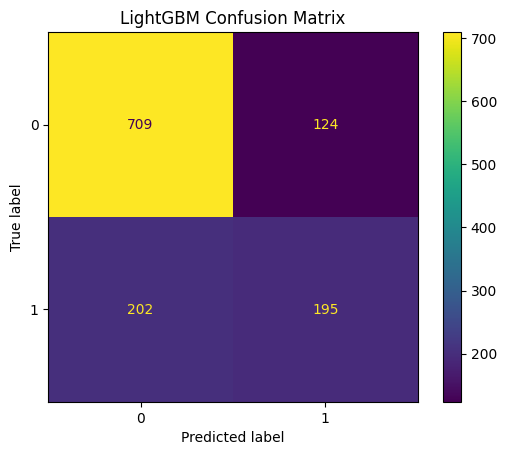

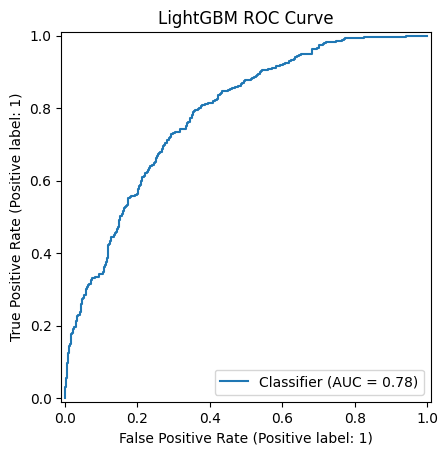

/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning:

[18:07:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




✅ XGBoost Results
Accuracy : 0.7317
Precision: 0.6000
Recall   : 0.5063
F1 Score : 0.5492
ROC AUC  : 0.7751

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.84      0.81       833
           1       0.60      0.51      0.55       397

    accuracy                           0.73      1230
   macro avg       0.69      0.67      0.68      1230
weighted avg       0.72      0.73      0.73      1230



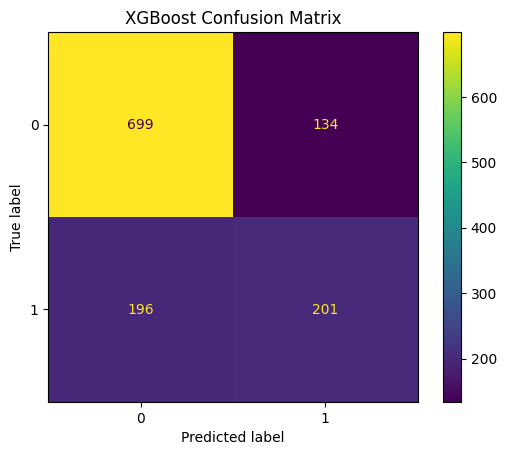

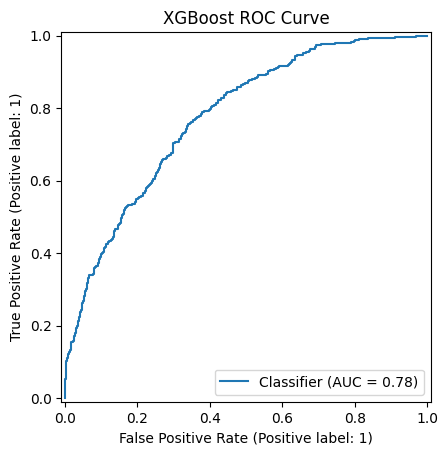

✅ Random Forest Results
Accuracy : 0.7447
Precision: 0.6708
Recall   : 0.4106
F1 Score : 0.5094
ROC AUC  : 0.7689

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.90      0.83       833
           1       0.67      0.41      0.51       397

    accuracy                           0.74      1230
   macro avg       0.72      0.66      0.67      1230
weighted avg       0.73      0.74      0.72      1230



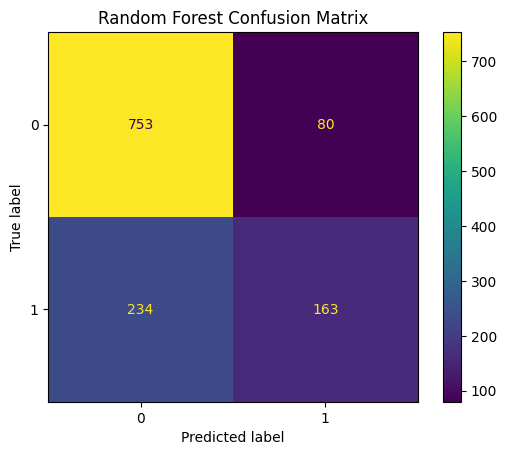

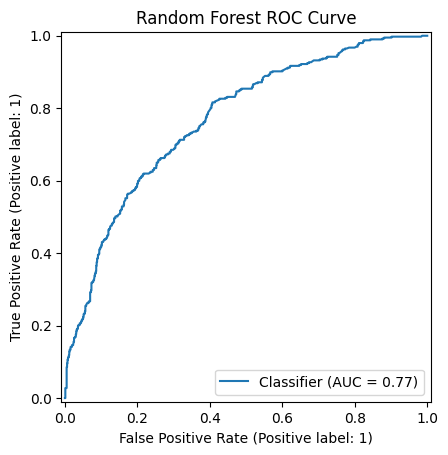

✅ CatBoost Results
Accuracy : 0.7350
Precision: 0.6228
Recall   : 0.4534
F1 Score : 0.5248
ROC AUC  : 0.7807

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.87      0.82       833
           1       0.62      0.45      0.52       397

    accuracy                           0.73      1230
   macro avg       0.70      0.66      0.67      1230
weighted avg       0.72      0.73      0.72      1230



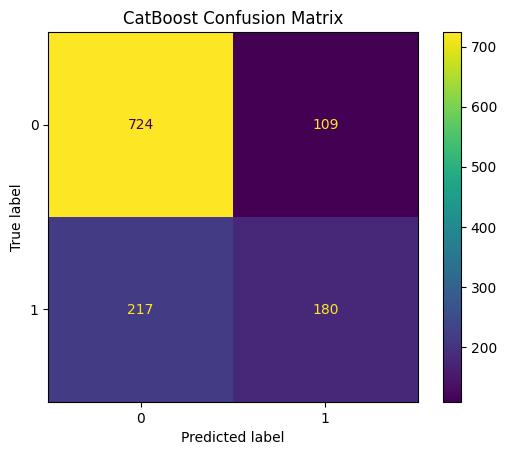

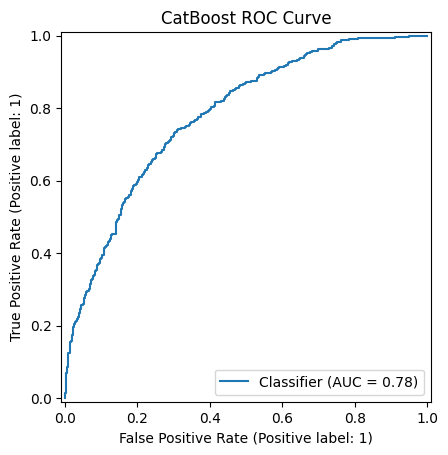

In [611]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    RocCurveDisplay,
    classification_report
)
from catboost import CatBoostClassifier

def evaluate_model(name, pipeline, X_test, y_test, probs, preds):
    print(f"✅ {name} Results")
    print(f"Accuracy : {accuracy_score(y_test, preds):.4f}")
    print(f"Precision: {precision_score(y_test, preds):.4f}")
    print(f"Recall   : {recall_score(y_test, preds):.4f}")
    print(f"F1 Score : {f1_score(y_test, preds):.4f}")
    print(f"ROC AUC  : {roc_auc_score(y_test, probs):.4f}")
    print("\nClassification Report:\n", classification_report(y_test, preds))

    ConfusionMatrixDisplay.from_predictions(y_test, preds)
    plt.title(f"{name} Confusion Matrix")
    plt.show()

    RocCurveDisplay.from_predictions(y_test, probs)
    plt.title(f"{name} ROC Curve")
    plt.show()


# === LightGBM ===
lgb_model = LGBMClassifier(random_state=42)
lgb_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('clf', lgb_model)
])
lgb_pipeline.fit(X_train, y_train)
lgb_preds = lgb_pipeline.predict(X_test)
lgb_probs = lgb_pipeline.predict_proba(X_test)[:, 1]
evaluate_model("LightGBM", lgb_pipeline, X_test, y_test, lgb_probs, lgb_preds)


# === XGBoost ===
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('clf', xgb_model)
])
xgb_pipeline.fit(X_train, y_train)
xgb_preds = xgb_pipeline.predict(X_test)
xgb_probs = xgb_pipeline.predict_proba(X_test)[:, 1]
evaluate_model("XGBoost", xgb_pipeline, X_test, y_test, xgb_probs, xgb_preds)

# === RandomForest ===
rf_pred = rf_pipeline.predict(X_test)
rf_probs = rf_pipeline.predict_proba(X_test)[:, 1]
evaluate_model("Random Forest", rf_pipeline, X_test, y_test, rf_probs, rf_pred)

# === CatBoost ===
cat_model = CatBoostClassifier(iterations=1000, random_seed=42, verbose=0)
cat_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('clf', cat_model)
])
cat_pipeline.fit(X_train, y_train)
cat_preds = cat_pipeline.predict(X_test)
cat_probs = cat_pipeline.predict_proba(X_test)[:, 1]
evaluate_model("CatBoost", cat_pipeline, X_test, y_test, cat_probs, cat_preds)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from scipy.stats import reciprocal


In [ ]:
def create_model(n_layers=1, n_units=32, learning_rate=1e-3, input_shape=None):
    from tensorflow import keras
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=input_shape))
    for _ in range(n_layers):
        model.add(keras.layers.Dense(n_units, activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

In [ ]:
preprocessor.fit(X_train)
input_dim = preprocessor.transform(X_train).shape[1]

def create_model(n_layers=1,
                 n_units=32,
                 learning_rate=1e-3,
                 input_shape=(input_dim,)):
    model = Sequential()
    model.add(Dense(n_units, activation='relu', input_shape=input_shape))
    for _ in range(n_layers - 1):
        model.add(Dense(n_units, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
keras_clf = KerasClassifier(
    build_fn=create_model,
    epochs=30,
    batch_size=32,
    verbose=0,
    n_layers=1,
    n_units=32,
    learning_rate=1e-3,
)


pipeline = Pipeline([
    ('prep', preprocessor),
    ('clf', keras_clf)
])


param_dist = {
    'clf__n_layers':        [0, 1, 2],
    'clf__n_units':         [32, 64, 128],
    'clf__learning_rate':   [1e-4, 1e-3, 1e-2],
    'clf__epochs':          [20, 50],
    'clf__batch_size':      [16, 32],
}

rnd = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='accuracy',
    random_state=42,
    verbose=2
)

rnd.fit(X_train, y_train)
print("Best score:", rnd.best_score_)
print("Best params:", rnd.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.

/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



[CV] END clf__batch_size=32, clf__epochs=20, clf__learning_rate=0.01, clf__n_layers=1, clf__n_units=128; total time=  16.0s


/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.

/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



[CV] END clf__batch_size=32, clf__epochs=20, clf__learning_rate=0.01, clf__n_layers=1, clf__n_units=128; total time=  14.6s


/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.

/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



[CV] END clf__batch_size=32, clf__epochs=20, clf__learning_rate=0.01, clf__n_layers=1, clf__n_units=128; total time=  14.1s


/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.

/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



[CV] END clf__batch_size=16, clf__epochs=20, clf__learning_rate=0.001, clf__n_layers=0, clf__n_units=64; total time=  28.5s


/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.

/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



[CV] END clf__batch_size=16, clf__epochs=20, clf__learning_rate=0.001, clf__n_layers=0, clf__n_units=64; total time=  27.7s


/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.

/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



[CV] END clf__batch_size=16, clf__epochs=20, clf__learning_rate=0.001, clf__n_layers=0, clf__n_units=64; total time=  25.3s


/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.

/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



[CV] END clf__batch_size=16, clf__epochs=20, clf__learning_rate=0.0001, clf__n_layers=1, clf__n_units=64; total time=  25.4s


/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.

/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



[CV] END clf__batch_size=16, clf__epochs=20, clf__learning_rate=0.0001, clf__n_layers=1, clf__n_units=64; total time=  24.7s


/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.

/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



[CV] END clf__batch_size=16, clf__epochs=20, clf__learning_rate=0.0001, clf__n_layers=1, clf__n_units=64; total time=  24.5s


/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.

/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



[CV] END clf__batch_size=32, clf__epochs=50, clf__learning_rate=0.0001, clf__n_layers=0, clf__n_units=128; total time=  33.1s


/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.

/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



[CV] END clf__batch_size=32, clf__epochs=50, clf__learning_rate=0.0001, clf__n_layers=0, clf__n_units=128; total time=  33.4s


/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.

/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



[CV] END clf__batch_size=32, clf__epochs=50, clf__learning_rate=0.0001, clf__n_layers=0, clf__n_units=128; total time=  34.6s


/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.

/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



[CV] END clf__batch_size=32, clf__epochs=20, clf__learning_rate=0.0001, clf__n_layers=2, clf__n_units=128; total time=  18.5s


/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.

/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



[CV] END clf__batch_size=32, clf__epochs=20, clf__learning_rate=0.0001, clf__n_layers=2, clf__n_units=128; total time=  16.4s


/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.

/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



[CV] END clf__batch_size=32, clf__epochs=20, clf__learning_rate=0.0001, clf__n_layers=2, clf__n_units=128; total time=  16.4s


/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.

/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



[CV] END clf__batch_size=32, clf__epochs=20, clf__learning_rate=0.001, clf__n_layers=1, clf__n_units=64; total time=  13.5s


/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.

/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



[CV] END clf__batch_size=32, clf__epochs=20, clf__learning_rate=0.001, clf__n_layers=1, clf__n_units=64; total time=  13.0s


/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.

/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



[CV] END clf__batch_size=32, clf__epochs=20, clf__learning_rate=0.001, clf__n_layers=1, clf__n_units=64; total time=  13.3s


/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.

/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



[CV] END clf__batch_size=16, clf__epochs=50, clf__learning_rate=0.0001, clf__n_layers=1, clf__n_units=32; total time= 1.1min


/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.

/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



[CV] END clf__batch_size=16, clf__epochs=50, clf__learning_rate=0.0001, clf__n_layers=1, clf__n_units=32; total time= 1.0min


/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.

/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



[CV] END clf__batch_size=16, clf__epochs=50, clf__learning_rate=0.0001, clf__n_layers=1, clf__n_units=32; total time= 1.1min


/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.

/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



[CV] END clf__batch_size=16, clf__epochs=50, clf__learning_rate=0.01, clf__n_layers=0, clf__n_units=32; total time= 1.0min


/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.

/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



[CV] END clf__batch_size=16, clf__epochs=50, clf__learning_rate=0.01, clf__n_layers=0, clf__n_units=32; total time=  59.9s


/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.

/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



[CV] END clf__batch_size=16, clf__epochs=50, clf__learning_rate=0.01, clf__n_layers=0, clf__n_units=32; total time= 1.1min


/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.

/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



[CV] END clf__batch_size=32, clf__epochs=50, clf__learning_rate=0.001, clf__n_layers=1, clf__n_units=128; total time=  34.3s


/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.

/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



[CV] END clf__batch_size=32, clf__epochs=50, clf__learning_rate=0.001, clf__n_layers=1, clf__n_units=128; total time=  33.9s


/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.

/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



[CV] END clf__batch_size=32, clf__epochs=50, clf__learning_rate=0.001, clf__n_layers=1, clf__n_units=128; total time=  33.6s


/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.

/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



[CV] END clf__batch_size=16, clf__epochs=20, clf__learning_rate=0.001, clf__n_layers=0, clf__n_units=128; total time=  24.6s


/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.

/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



[CV] END clf__batch_size=16, clf__epochs=20, clf__learning_rate=0.001, clf__n_layers=0, clf__n_units=128; total time=  25.8s


/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.

/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



[CV] END clf__batch_size=16, clf__epochs=20, clf__learning_rate=0.001, clf__n_layers=0, clf__n_units=128; total time=  26.8s


/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.

/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Best score: 0.6997532668673608
Best params: {'clf__n_units': 64, 'clf__n_layers': 0, 'clf__learning_rate': 0.001, 'clf__epochs': 20, 'clf__batch_size': 16}


In [ ]:
model = rnd.best_estimator_.named_steps['clf'].model_
model.summary()

Model: "sequential_211"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_368 (Dense)               │ (None, 64)             │        10,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_369 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,493 (123.02 KB)

 Trainable params: 10,497 (41.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,996 (82.02 KB)

154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7451 - loss: 0.5262
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
✅ ANN Results
Accuracy : 0.7065
Precision: 0.5804
Recall   : 0.3275
F1 Score : 0.4187
ROC AUC  : 0.7079

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.89      0.80       833
           1       0.58      0.33      0.42       397

    accuracy                           0.71      1230
   macro avg       0.66      0.61      0.61      1230
weighted avg       0.68      0.71      0.68      1230



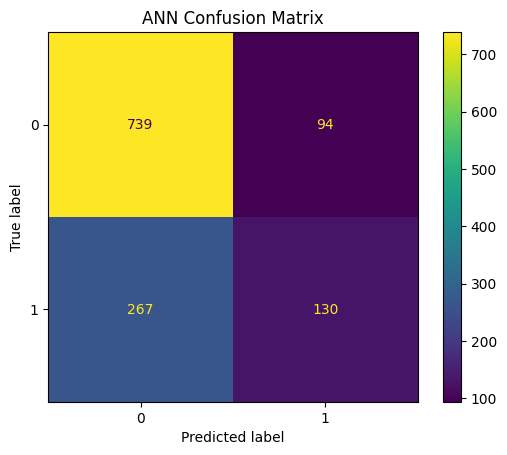

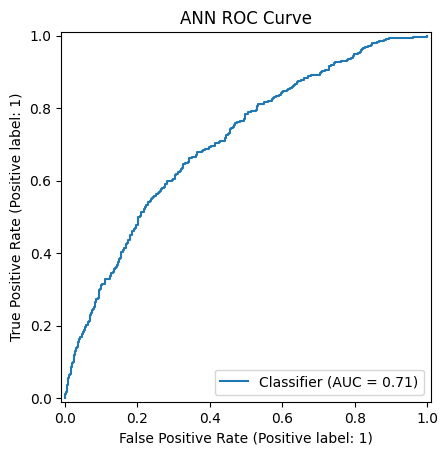

In [ ]:
# Ensure that X_test is preprocessed before passing it to the model
X_test_transformed = preprocessor.transform(X_test)

ann_pipeline = Pipeline([
    ('prep', preprocessor),
    ('clf', model)
])
ann_pipeline.fit(X_train, y_train)
# Use the model's predict method to get probabilities
ann_probs = ann_pipeline.named_steps['clf'].predict(X_test_transformed).flatten()

# Convert probabilities to binary predictions using a threshold of 0.5
ann_preds = (ann_probs >= 0.5).astype(int)

evaluate_model("ANN", ann_pipeline, X_test, y_test, ann_probs, ann_preds)

In [ ]:
from sklearn.decomposition import PCA

X_train_preprocessed = preprocessor.transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)
pca.fit(X_train_preprocessed)
X_train_pca = pca.transform(X_train_preprocessed)
X_test_pca = pca.transform(X_test_preprocessed)

Explained variance ratio for 1 components: [0.99981193]
Explained variance ratio for 2 components: [9.99811927e-01 2.77654042e-05]
Explained variance ratio for 3 components: [9.99811927e-01 2.77654042e-05 1.73337654e-05]
Explained variance ratio for 4 components: [9.99811927e-01 2.77654042e-05 1.73337654e-05 1.49980125e-05]


✅ Random Forest with PCA Results
Accuracy : 0.6439
Precision: 0.4481
Recall   : 0.4458
F1 Score : 0.4470
ROC AUC  : 0.6309

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.74      0.74       833
           1       0.45      0.45      0.45       397

    accuracy                           0.64      1230
   macro avg       0.59      0.59      0.59      1230
weighted avg       0.64      0.64      0.64      1230



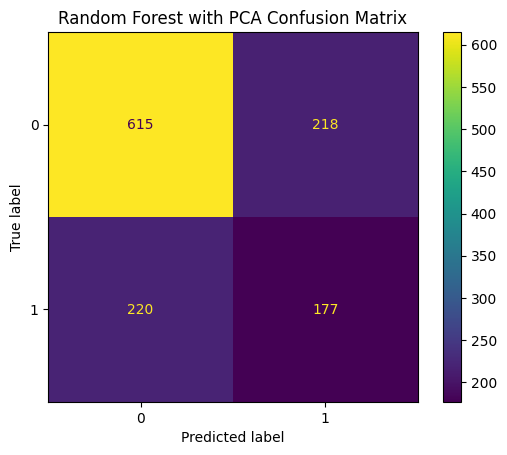

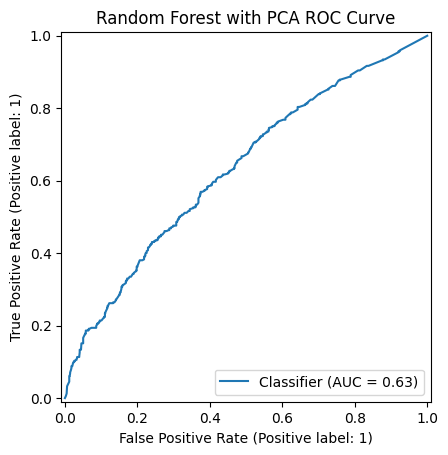

In [584]:
rf_pipeline.named_steps['clf'].fit(X_train_pca, y_train)
rf_pca_pred = rf_pipeline.named_steps['clf'].predict(X_test_pca)
rf_pca_probs = rf_pipeline.named_steps['clf'].predict_proba(X_test_pca)[:, 1]
evaluate_model("Random Forest with PCA", rf_pipeline, X_test_pca, y_test, rf_pca_probs, rf_pca_pred)

In [589]:
y_test.value_counts()

success
0    833
1    397
Name: count, dtype: int64